In [12]:
import geopandas as gpd
import networkx as nx
from src.constants import GWS_DATA_DIR
veg_data = gpd.read_file(GWS_DATA_DIR / "chernobyl_habitat_data" / "Vegetation_mape.shp")

In [13]:
veg_data

,Vegetation,AREA,geometry
0,1,24.85380,"POLYGON Z ((547927.772 5710698.315 0.000, 5479..."
1,1,7.91757,"POLYGON Z ((550978.781 5711148.814 0.000, 5510..."
2,1,7.86063,"POLYGON Z ((594252.852 5711098.250 0.000, 5940..."
3,1,10.45270,"POLYGON Z ((595635.535 5712690.988 0.000, 5956..."
4,1,7.52688,"POLYGON Z ((595986.627 5712815.878 0.000, 5960..."
...,...,...,...
14905,77,9.88831,"POLYGON Z ((585295.961 5773864.611 0.000, 5854..."
14906,77,5.99406,"POLYGON Z ((588179.310 5773408.130 0.000, 5882..."
14907,77,9.59274,"POLYGON Z ((575722.551 5775285.145 0.000, 5757..."
14908,77,13.83560,"POLYGON Z ((576956.096 5775194.964 0.000, 5770..."


In [14]:
# WARNING: this cell takes a while to run, is better on sci 3, 6, or 8
# It took about 25 minutes to run on sci 6 - the time consuming parts are `touches` and `overlaps`
graph_dict = {}
G = nx.Graph()
for index, row in veg_data.iterrows():
    # find all polygons which touch the borders of this one
    neighbours = set(veg_data[veg_data.geometry.touches(row['geometry'])].index)
    # and all polygons which overlap with this one, to account for discrepancies
    overlap = set(veg_data[veg_data.geometry.overlaps(row['geometry'])].index)

    neighbours = set.union(neighbours, overlap)
    # the dict maps polygon indices in veg_data to a set of neighbouring polygon indices
    graph_dict[index] = neighbours
    # add each polygon as a node to the graph, with the landcover class, area, and full polygon object as node attributes
    G.add_node(index, landcover=row['Vegetation'], area=row['AREA'], geometry=row['geometry'])

In [15]:
# iterate through the dict and add all edges between neighbouring polygons
for polygon_id, neighbours in graph_dict.items():
    for neighbour_id in neighbours:
        G.add_edge(polygon_id, neighbour_id)

In [16]:
print(G.number_of_nodes(), G.number_of_edges())

14910 39562


In [17]:
# list of nodes adjacent to 0 and 434
print(list(G.adj[0]))
print(list(G.adj[434]))

[434, 10852, 7735]
[0, 6884, 7735, 11209, 8348, 2863]


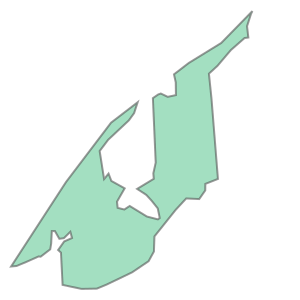

In [19]:
G.nodes[0]['geometry']

In [22]:
nx.write_gpickle(G, "vegetation_graph.pickle")

In [23]:
H = nx.read_gpickle("vegetation_graph.pickle")

14910 39562
[434, 10852, 7735]
[0, 6884, 7735, 11209, 8348, 2863]


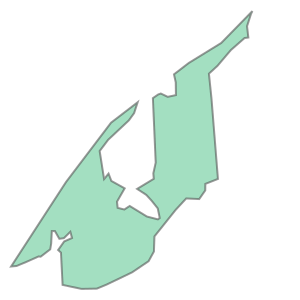

In [24]:
print(H.number_of_nodes(), H.number_of_edges())
print(list(H.adj[0]))
print(list(H.adj[434]))
H.nodes[0]['geometry']